# C5.4 Networks: Problem Set 1
## Tom Galligan
### Tutor: Mr Florian Kimm

## Question 1 

a) I'll write my code in Python scripts and transfer it to notebooks for submitting problem sheets.

b) I'm familiar with Python already, but I used the NetworkX documentation (https://networkx.github.io/) to learn how to use the library. 

c) I downloaded NetworkX. 

d) I explored two networks:

American College football clubs, with the edges showing which clubs competed against eachother. 

The Zachary Karate School, with the edges showing ties between members of the club, 

e) The networks are represented below:

Downloading the football club data in a way that keeps this notebook portable across machines is a bit awkward. The code below is taken from https://networkx.github.io/documentation/stable/auto_examples/graph/plot_football.html.

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


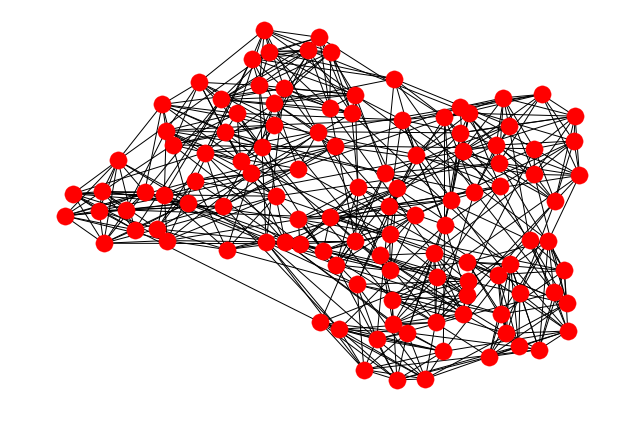

In [28]:

import urllib.request as urllib
import io
import zipfile
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read('football.txt').decode()  # read info file
gml = zf.read('football.gml').decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split('\n')[1:]

F = nx.parse_gml(gml)
nx.draw(F)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Text(0.5, 1.0, 'Zachary Club Network')

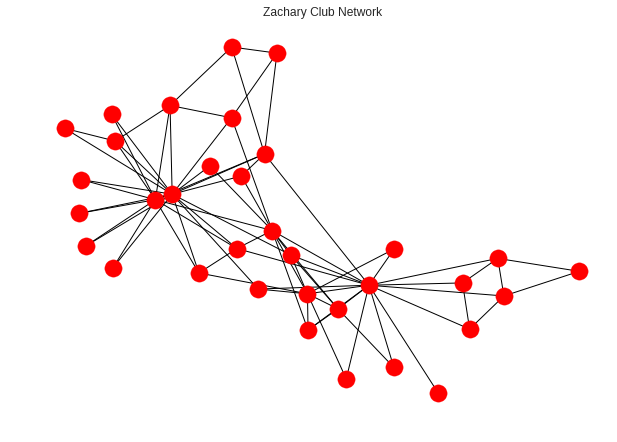

In [0]:

G = nx.karate_club_graph()
nx.draw(G)
plt.title('Zachary Club Network')

Now we can plot the degree distributions for our two graphs

Text(0, 0.5, 'Frequency')

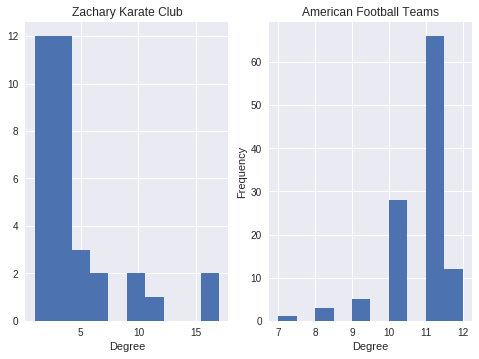

In [0]:
zach_degs = [degree for node, degree in G.degree()]
football_degs = [degree for node, degree in F.degree()]
fig, ax = plt.subplots(1,2)
ax[0].hist(zach_degs,bins=10)
ax[0].set_title('Zachary Karate Club')
ax[0].set_xlabel('Degree')
ax[1].set_ylabel('Frequency')
ax[1].hist(football_degs,bins=10)
ax[1].set_title('American Football Teams')
ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Frequency')

The two networks have very different degree distributions. While most members of the Karate Club had ties to a relatively small number of people, with a few people having many ties, the distribution for the American football teams is the other way around: the majority of football teams played many games, while only a few played a smaller number. 

# Question 2

a) using the computer language of your choice, calculate the mean and variance of a bernoulli process as a function of p. 

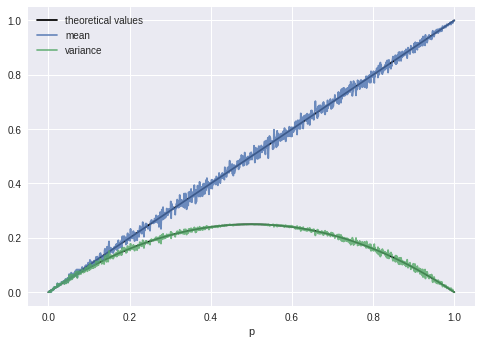

In [0]:
# The first thing we need to do is create an event with the probability of success equal to p.
import numpy as np

N=1000
def event(p):
	# random number uniformly drawn from [0,1)
  rand_num = np.random.random_sample() 

	if rand_num < p: # success
		return 1
	else: # failure
		return 0


# now we create a process that runs event(p) a large number of times. 
# it returns the mean and variance of the result. 
means = []
variances = []
def process(p):
	results = []
	for i in range(N):
		results.append(event(p))

	mean = np.mean(results)
	variance = np.var(results)

	means.append(mean)
	variances.append(variance)

# now we run for N values of p, from 0.0 to 1.0
Np = 100
ps = np.linspace(0.0,1.0,N)

for p in ps:
	process(p)


# we can also plot the theoretical values for the mean and variance:

def true_mean(p): # p is a vector here
	return p

def true_var(p):
	return p*(np.ones(len(p))-p)


# plot results
plt.plot(ps, true_mean(ps),c='k', label='theoretical values')
plt.plot(ps, true_var(ps), c='k')
plt.plot(ps,means,label='mean',alpha=0.8)
plt.plot(ps,variances,label='variance',alpha=0.8)
plt.xlabel('p')
plt.legend()


2b) Random Walk on a 1D line

Text(0.5, 1.0, 'p(x,t) for a 1000-step walk, sampled 1000 times')

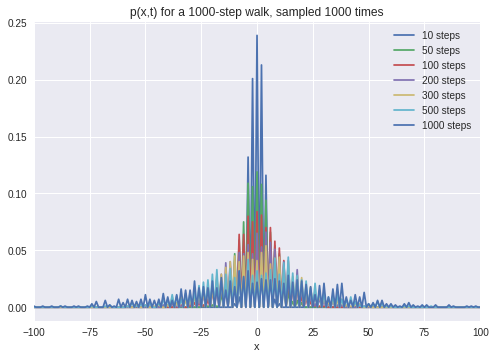

In [0]:
# first create a coin to toss, to determine if the walker goes left or right

def step():
	if np.random.random_sample()>0.5:
		return 1 # go right
	else: return -1 # go left

# now define the walk
def walk(N): # walk of N steps
	x = 0 # start at origin
	xs = [0] # list of x locations.
	for i in range(N):
		step_taken = step() # take step
		x += step_taken
		xs.append(x)
	return xs

""" for each step taken, we want to know what the probability of 
being at a particular x value is
so we're going to have an array. """ 

# run loads of random walks. When the walker lands at x, 
# add one to the value in your array of probabilities.
# normalise your rows at the end (divide by mean). 

xlimit = 200
N_walks = 1000
walk_length = 1000
X = np.linspace(-xlimit,xlimit,2*xlimit+1) # -xlimit to xlimit inclusive
p_x = np.zeros((walk_length+1,len(X)))

for i in range(N_walks): # for each walk
	current_walk = walk(walk_length) # do a walk, return array of x locations.
	for j in range(walk_length+1): # for each step of the walk
		try:
			# increase by one the value of p(x,j) at the x location of the walker
			p_x[j,np.where(X==current_walk[j])[0][0]] += 1 

		except: IndexError # walker has wandered outside of our X region. 
		pass # just ignore it

# normalise
for j in range(walk_length+1):
	p_x[j,:] = p_x[j,:]/np.sum(p_x[j,:])

for i in [10,50,100,200,300,500,1000]:
	plt.plot(X,p_x[i,:],label='%d steps' % i)
plt.xlim(-100,100) 
plt.xlabel('x')
plt.legend()
plt.title('p(x,t) for a %d-step walk, sampled %d times'% (walk_length, N_walks))


# NB if the number of steps is even, then p(x) = 0 for all even x
# similarly for odd number of steps (p(x) = 0 for all odd x.)




Text(0, 0.5, 'Kurtosis')

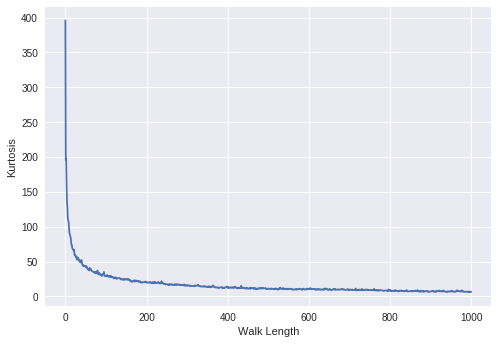

In [0]:
#test for Gaussianity
# we'll measure the kurtosis of the distribution. 
# a kurtosis of zero suggests perfect Gaussianity
from scipy.stats import kurtosis

plt.plot(np.arange(walk_length+1), kurtosis(p_x,axis=1))
plt.xlabel('Walk Length')
plt.ylabel('Kurtosis')

So the kurtosis of the distribution tends to a Gaussian at long times, as the theory predicts.

c) Eigenvalues of a Bernoulli matrix

In [0]:
#use the Bernoulli generator from before:
def event(p):
	# random number uniformly drawn from [0,1)
  rand_num = np.random.random_sample() 

	if rand_num < p: # success
		return 1
	else: # failure
		return 0

def B(p): # creates the bernoulli matrix
	size = 1000
	B = np.zeros((size,size)) # initialise

	for i in range(size):
		for j in range(i,size):
			B[i,j] = event(p)
			B[j,i] = B[i,j].copy() # B is symmetric

	return B



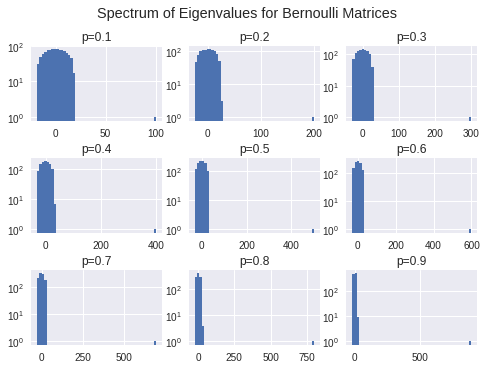

In [0]:
fig, ax = plt.subplots(3,3)

for i in range(3):
  for j in range(3):
    p = (j+3*i+1)/10.
    ax[i,j].hist(np.linalg.eig(B(p))[0],bins=50)
    ax[i,j].set_title('p=%1.1f' % p)
    ax[i,j].set_yscale('log')
plt.suptitle('Spectrum of Eigenvalues for Bernoulli Matrices')
plt.subplots_adjust(hspace=0.5)

We find that there is a p-invariant cluster of Eigenvalues around zero, and one large eigenalue that scales like Np, where N is the size of the matrix.

# Question 3

a) an example of a graph that is weakly connected but not strongly connected is 

([], <a list of 0 Text yticklabel objects>)

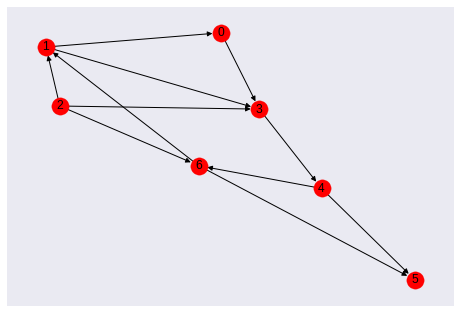

In [0]:
edges = [[1,0],[1,3],[0,3],[2,1],[2,6],[6,1],[2,3],[3,4],[4,6],[4,5],[6,5]]
nodes = [0,1,2,3,4,5,6]

G = nx.DiGraph()
G.add_edges_from(edges)
G.add_nodes_from(nodes)
nx.draw_networkx(G)
plt.xticks([])
plt.yticks([])

The adjacency matrix of this network is 

$A_{ij} =
 \begin{pmatrix}
  0 & 0 & 0 & 1 & 1 & 0 & 0  \\
  1 & 0 & 0 & 0 & 0 & 0 & 0  \\
  1 & 1 & 0 & 1 & 0 & 0 & 0  \\
  0 & 0 & 0 & 0 & 0& 0 & 0 \\
  0 & 0 & 0 & 1 & 0 & 1 & 0 \\ 
  0 & 0 & 1 & 0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0 & 1 & 1 & 0
 \end{pmatrix}$
 
 Random walkers will converge on node 5 at long times, since the random walk loses its randomness as walkers are forced to proceed in a certain direction.
 
 b) While undirected networks have symmetric adjacency matrices ( since if node 1 is connected to node 2, node 2 must be connected to node 1), the same is not generally true for directed networks. As a result, undirected networks' adjacency matrices have all real eigenvalues, while directed networks can have complex eigenvalues. For example, the eigenvalues of the adjacency matrix for the network above are complex:

In [0]:
A = np.transpose(nx.adjacency_matrix(G).todense()) # same form that we have
print(" Adjacency matrix:\n\n", A) # check we got the right adjacency matrix

print("\nEigenvalues:\n")
for i in range(7):
  print(np.linalg.eig(A)[0][i]) # print ith eigenvalue


 Adjacency matrix:

 [[0 0 0 1 1 0 0]
 [1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0]]

Eigenvalues:

0j
(1.167303978261418+0j)
(0.18123244446987546+1.0839541013177114j)
(0.18123244446987546-1.0839541013177114j)
(-0.7648844336005841+0.35247154603172615j)
(-0.7648844336005841-0.35247154603172615j)
0j


# Question 4

An example of a network with a large discrepancy between the global and local clustering coefficients is:



global clustering:  0.3333333333333333
mean local clustering:  0.9047619047619047
adjacency matrix:
 [[0 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 0]
 [1 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0]]


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


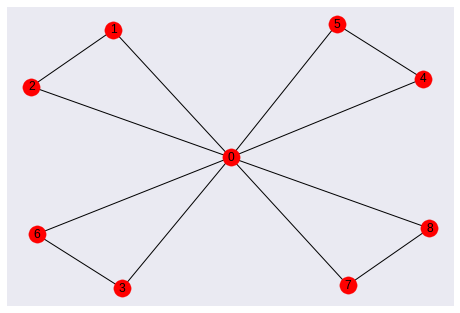

In [0]:
edges = [[0,1],[0,2],[0,3],[0,4],[0,5],
         [0,6],[0,7],[5,4],[2,1],[6,3],
         [0,8],[7,8]]
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8])
G.add_edges_from(edges)
nx.draw_networkx(G)
plt.xticks([])
plt.yticks([])
print("global clustering: ",nx.transitivity(G)) 
print("mean local clustering: ",nx.average_clustering(G)) 

print("adjacency matrix:\n",nx.adjacency_matrix(G).todense())

# Question 5

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


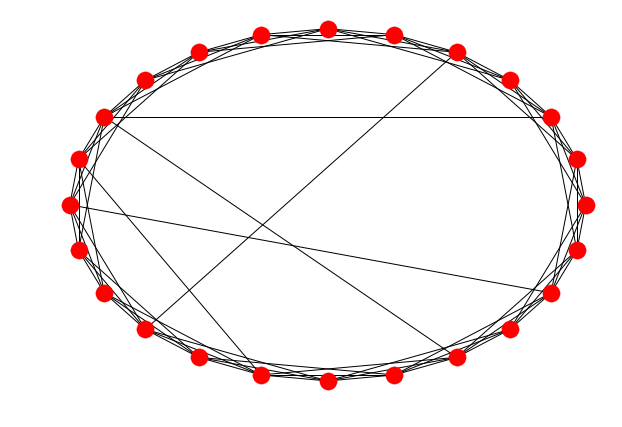

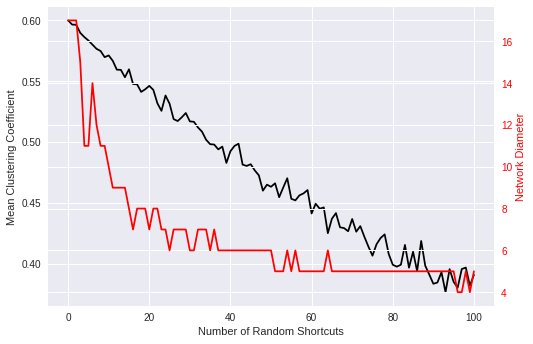

In [0]:
import networkx

def dist(i,j,N):
	#returns distance between the nodes given a 1D graph of N nodes
	diff = np.abs(i-j)
	
	return min(diff, N-diff)


def lattice(N,k,r):
	""" creates a lattice as in the type Fig 12c) with n
		nodes, connections between vertices closer than k
		or fewer lattice spacings, and r random shortcuts."""

	G = nx.Graph() # initialise graph
	G.add_nodes_from(np.arange(N)) # generates N nodes

	# create edges:
	ed = []
	for i in range(N):
		for j in range(N): # not hugely efficient, but easy to read
			if i==j: #same node. Ignore.
				continue
			
      elif dist(i,j,N)<=k: #nodes within distance k
				if (i,j) in G.edges() or (j,i) in G.edges(): #already have that edge
					continue
				else:
					ed.append((i,j))
	G.add_edges_from(ed)

	# now add the random connections

	for i in range(r):
		rand1 = np.random.randint(0,N)
		rand2 = np.random.randint(0,N)
		while rand2 == rand1 or (rand1,rand2) in G.edges(): #loop or already there
			rand1 = np.random.randint(0,N)
			rand2 = np.random.randint(0,N)
		G.add_edge(rand1,rand2)

	return G
# draw graph of 24 nodes, connected if distance <=3, with 5 random shortcuts
nx.draw_circular(lattice(24,3,5)) 


num = 100
R = np.linspace(0,num,num+1,dtype=int)
mean_cc = []
diam = []
for r in R:
	coeff_dict = nx.clustering(lattice(num,3,r))
	coeffs = [coeff_dict[key] for key in coeff_dict]
	mean_cc.append(np.mean(coeffs))
	diam.append(networkx.algorithms.distance_measures.diameter(lattice(num,3,r)))


fig, ax1 = plt.subplots()
ax1.plot(R, mean_cc,c='k')
ax1.set_xlabel('Number of Random Shortcuts')
ax1.set_ylabel('Mean Clustering Coefficient')

ax2 = ax1.twinx()
ax2.plot(R,diam,c='r')
ax2.set_ylabel('Network Diameter',color='r')
ax2.tick_params('y', colors='r')

plt.show()

This is a good model for a social network, as a small number of shortcuts leads to a dramatic decrease in the network diameter, which mimicks the small world phenomenon.  

# Question 6

a) We take the football network from earlier on. 

Some measures are not very correlated, e.g. betweenness centrality and eigenvector centrality. This is because they follow the same reasoning about a node's importance.



(0.1450369665501451, 0.12197260447937593)

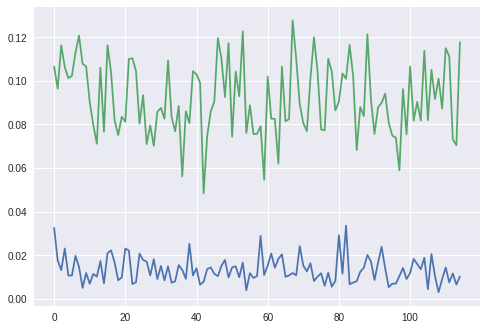

In [0]:
bet = nx.betweenness_centrality(F)
eig = nx.eigenvector_centrality(F)

bet_vals = [bet[key] for key in bet]
eig_vals = [eig[key] for key in eig]
plt.plot(bet_vals)
plt.plot(eig_vals)

from scipy.stats import pearsonr
pearsonr(bet_vals,eig_vals)

Some are more correlated, such as betweenness centrality and closeness centrality:

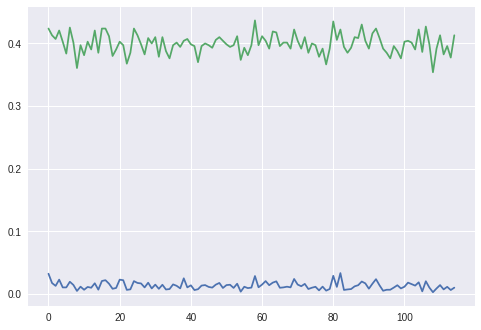

In [0]:
bet = nx.betweenness_centrality(F)
clo = nx.closeness_centrality(F)

bet_vals = [bet[key] for key in bet]
clo_vals = [clo[key] for key in clo]


from scipy.stats import pearsonr
pearsonr(bet_vals,clo_vals) # pearson coefficient

plt.plot(bet_vals)
plt.plot(clo_vals)

An example of a graph where one node has a high betweenness centrality but a low degree centrality is 

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


([], <a list of 0 Text yticklabel objects>)

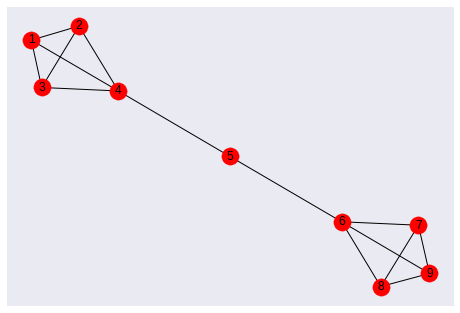

In [0]:
edges = [[1,2],[2,3],[1,3],[1,4],[2,4],[3,4],
         [4,5],[5,6],[6,8],[6,9],[6,7],[7,8],
         [7,9],[8,9]]
nodes = [1,2,3,4,5,6,7,8,9]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw_networkx(G)
plt.xticks([])
plt.yticks([])

Here, node 5 has the highest betweenness centrality, but the lowest degree centrality. Note that most nodes have 0 betweenness centrality.

Text(0.5, 0, 'Node number')

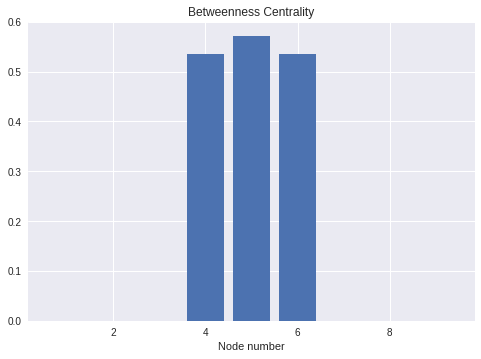

In [0]:
bet = nx.betweenness_centrality(G)
deg = nx.degree_centrality(G)
plt.bar(nodes,[bet[val] for val in bet])
plt.title('Betweenness Centrality')
plt.xlabel('Node number')

Text(0.5, 0, 'Node number')

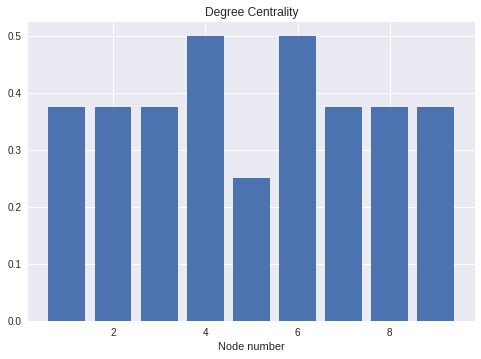

In [0]:
plt.bar(nodes,[deg[val] for val in deg])
plt.title('Degree Centrality')
plt.xlabel('Node number')

b) As in the paper, we define the dynamical importance of an edge $(i,j)$ by 

\begin{equation}
I_{ij} \equiv -\frac{\Delta\lambda_{ij}} {\lambda}
\end{equation}

where $\Delta\lambda$ is the change in the largest eigenvalue of the adjacency matrix upon removal of the edge $(i,j)$. 

If the adjacency matrix is sufficiently large, then the largest eigenvalue $\lambda$ will not change much upon removal of the edge, and neither will the associated (right-) eigenvalue $u$. We take the perturbed eigenvalue equation and left-multiply by $v^T$:

\begin{equation}
v^T(A+\Delta A)(u+\Delta u) = (\lambda + \Delta\lambda)(u+\Delta u)
\end{equation}

Keeping terms up to first order smallness (in $\Delta$) we have 

\begin{equation}
v^T (Au + A\Delta u + \Delta A u) = v^T(\lambda u + \lambda \Delta u + \Delta\lambda u)
\end{equation}

cancelling $Au = \lambda u$, and $v^T A \Delta u = v^T \lambda \Delta u$, we have

\begin{equation}
v^T \Delta A u = \Delta \lambda v^T u, 
\end{equation}
i.e. 
$\Delta \lambda = \frac{v^T  \Delta A u}{v^T u}$.

Upon removal of edge $(i,j)$,
$A_{lm} \rightarrow A_{lm}(1-\delta_{il}\delta_{jm})$, since we wish to set the $(i,j)$th component of A to zero.

Then we have an approximation of the edge importance given by 


\begin{align}\hat{I}_{ij} \approx -\frac{\Delta\lambda_{ij}}{\lambda} &= -\frac{v_l(-\delta_{il}\delta_{jm}A_{lm})u_j}{\lambda v^T u} \\&=\frac{A_{ij}v_i u_j}{\lambda v^T u}
\end{align}


To find the dynamical importance of a node, we must remove all edges going into and out of the node. This leads to a change in the adjacency matrix of 

\begin{equation}
\Delta A_{lm} =-A_{lm}(\delta_{lk}+\delta_{mk}).
\end{equation}

Each Kronecker delta ensures that all connections to node $k$ are removed (we need two to allow for asymmetric $A$ (digraphs)).

We cannot perform the previous perturbative expansion since we cannot guarantee that the change in $u$ is small, as we will remove its $k^{\rm th}$ component entirely. To resolve this, let $\Delta u = \delta u - u_k \hat{e}_k$, where $\delta u \ll ||u||$ and we do not sum over k. Then our expansion reads 

\begin{equation}
v^T(A+\Delta A)(u + \delta u - u_k \hat{e}_k ) = (\lambda + \Delta \lambda)(u +\delta u - u_k \hat{e}_k )
\end{equation}

Keeping terms up to first order smallness, and cancelling, we have 

\begin{equation}
v^T(\Delta A u - \Delta A u_k \hat{e}_k) = \Delta \lambda ( v^T u  - v^T u_k \hat{e}_k)
\end{equation}

Then using $v^T \hat{e}_k = v_k$, we have 

\begin{equation}
\Delta \lambda = \frac{v^T \Delta A u - u_k - u_k v^T\Delta A \hat{e}_k}{v^T u - v_k u_k}.
\end{equation}


Substitute in for $\Delta A$, and we have 

\begin{align}
v^T \Delta A u &= v_l(-A_{lm}(\delta_{lk}+\delta_{mk})) u_m \\
&= -v_k \lambda u_k - v_k \lambda u_k \\
& = -2\lambda v_k u_k
\end{align}

and similarly 

\begin{equation}
u_k v^T \Delta A \hat{e}_k = \lambda u_k v_k.
\end{equation}

If the network is sufficiently large, then it is reasonable to assume that $u_kv_k \ll v^T u$. Then we have 
\begin{align}
\hat{I}_k &\approx -\frac{\Delta \lambda_k}{\lambda} \\
& = \frac{\lambda v_ku_k}{v^Tu - u_kv_k} \\ 
&\approx \frac{\lambda v_ku_k}{v^Tu}
\end{align}

as required. 